**About Dataset**

Dataset: E-commerce Customer Behavior

**Source:** [Kaggle - E-commerce Customer Behavior](https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset)

**Overview:**

This dataset offers a detailed view of customer behavior on an e-commerce platform. Each row represents a unique customer, including their transaction history and interaction patterns. 

In this project, I aim to analyze and profile high-CLV (Customer Lifetime Value) segments, as part of my data analyst portfolio. The goal is to identify key traits of valuable customers and generate insights that can help improve customer retention and personalization strategies.

**Key Features:**

- `Customer ID`: Unique identifier for each customer
- `City`: Customer’s location
- `Membership Type`: Tier of customer membership
- `Total Spend`: Total amount spent
- `Satisfaction Level`: Customer satisfaction score
- `Items Purchased`: Number of items bought
- `Days Since Last Purchase`: Recency of the customer's last transaction


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/e-commerce-customer-behavior/E-commerce Customer Behavior - Sheet1.csv')

df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


**Data Understanding and Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [4]:
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [6]:
df.groupby('Satisfaction Level')['Average Rating'].mean()

Satisfaction Level
Neutral        3.655140
Satisfied      4.646400
Unsatisfied    3.692241
Name: Average Rating, dtype: float64

In [7]:
df['Satisfaction Level'] = df['Satisfaction Level'].fillna('Unsatisfied')

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


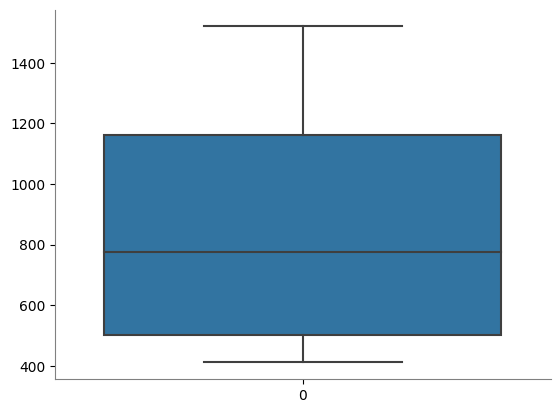

In [10]:
sns.boxplot(df['Total Spend'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

In [11]:
Q1 = df['Total Spend'].quantile(0.25)
Q3 = df['Total Spend'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Total Spend'] < Q1 - 1.5 * IQR) | (df['Total Spend'] > Q3 + 1.5 * IQR)]
outliers.count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

**Exploratory Data Analyst**

In [12]:
clv = df.groupby('Customer ID')['Total Spend'].sum().reset_index()
clv.columns = ['Customer ID', 'CLV']
clv

,Customer ID,CLV
0,101,1120.20
1,102,780.50
2,103,510.75
3,104,1480.30
4,105,720.40
...,...,...
345,446,660.30
346,447,470.50
347,448,1190.80
348,449,780.20


In [13]:
quartiles = clv['CLV'].quantile([0.25, 0.5, 0.75])

def clv_category(value):
    if value >= quartiles[0.75]:
        return 'High'
    elif value >= quartiles[0.50]:
        return 'Medium'
    elif value >= quartiles[0.25]:
        return 'Low'
    else:
        return 'Very Low'

clv['CLV Category'] = clv['CLV'].apply(clv_category)


In [14]:
df = df.merge(clv, on='Customer ID', how='left')
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,CLV,CLV Category
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,1120.20,Medium
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,780.50,Medium
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,510.75,Low
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,1480.30,High
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,720.40,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,660.30,Low
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,470.50,Very Low
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,1190.80,High
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,780.20,Medium


In [15]:
df['CLV Category'].value_counts()

CLV Category
High        89
Very Low    88
Low         87
Medium      86
Name: count, dtype: int64

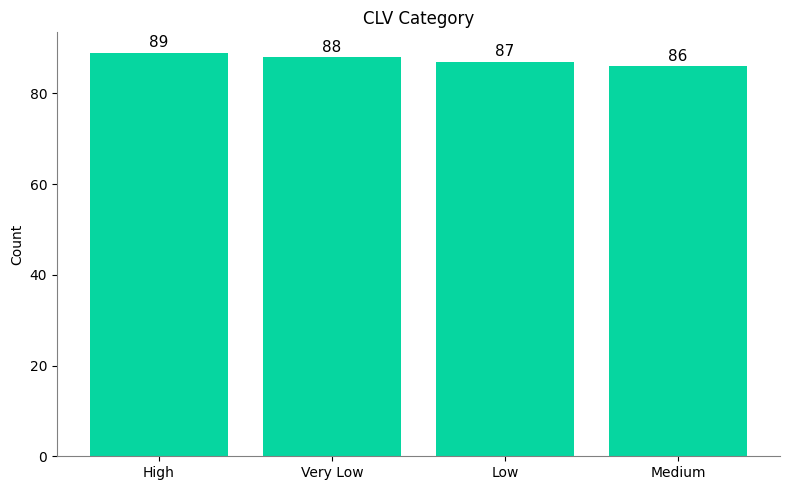

In [16]:
CLV = df['CLV Category'].value_counts().reset_index()
CLV.columns = ['CLV Category', 'Count']

plt.figure(figsize=(8, 5))
bars = plt.bar(CLV['CLV Category'], CLV['Count'], color='#06D6A0')
plt.title('CLV Category')
plt.xlabel('')
plt.ylabel('Count')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.grid(False)
plt.tight_layout()
plt.show()

**CLV Distribution**  

The CLV values are tightly clustered between 86 and 89, indicating limited variation across customers. This suggests segmentation based on small behavioral differences.


In [17]:
pd.crosstab(df['Membership Type'], df['CLV Category'])

CLV Category,High,Low,Medium,Very Low
Membership Type,,,,
Bronze,0,28,0,88
Gold,89,0,28,0
Silver,0,59,58,0


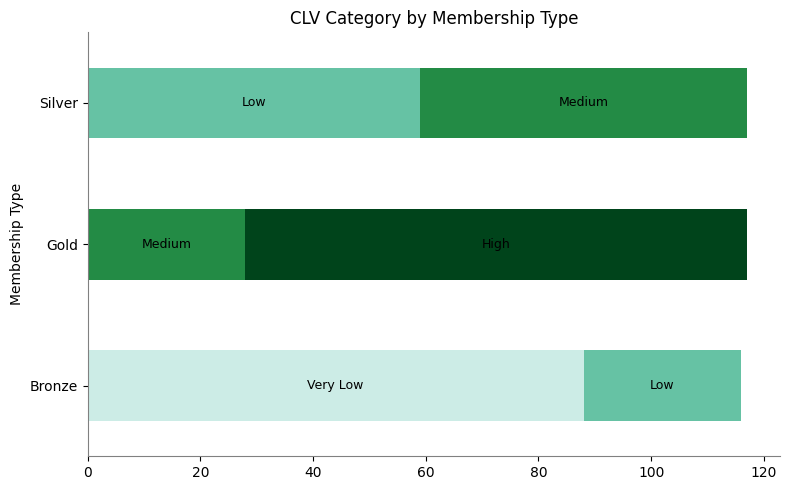

In [18]:
clv_by_membership = pd.crosstab(df['Membership Type'], df['CLV Category'])
clv_by_membership = clv_by_membership[['Very Low', 'Low', 'Medium', 'High']]

colors = ['#ccece6', '#66c2a4', '#238b45', '#00441b']

ax = clv_by_membership.plot(
    kind='barh',
    stacked=True,
    figsize=(8, 5),
    color=colors
)

ax.set_yticks(range(len(clv_by_membership.index)))
ax.set_yticklabels(clv_by_membership.index)

for container in ax.containers:
    for i, patch in enumerate(container.patches):
        width = patch.get_width()
        if width > 0:

            x = patch.get_x() + width / 2
            y = patch.get_y() + patch.get_height() / 2
            clv_category = clv_by_membership.columns[ax.containers.index(container)]
            ax.text(
                x,
                y,
                f"{clv_category}",
                va='center',
                ha='center',
                color='black',
                fontsize=9
            )


plt.title('CLV Category by Membership Type')
plt.xlabel('')
plt.ylabel('Membership Type')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.legend().remove()
plt.tight_layout()
plt.show()

**Membership Type vs CLV**

All High-CLV customers are Gold members, highlighting a strong link between membership tier and customer value. Among Medium-CLV customers, 76% hold Silver memberships, while only 24% are in Gold.

**Interpretation:** 

Gold membership is a strong indicator of high customer value. Encouraging customers to upgrade could improve overall CLV.


In [19]:
pd.crosstab(df['Satisfaction Level'], df['CLV Category'])

CLV Category,High,Low,Medium,Very Low
Satisfaction Level,,,,
Neutral,0,1,50,56
Satisfied,89,0,36,0
Unsatisfied,0,86,0,32


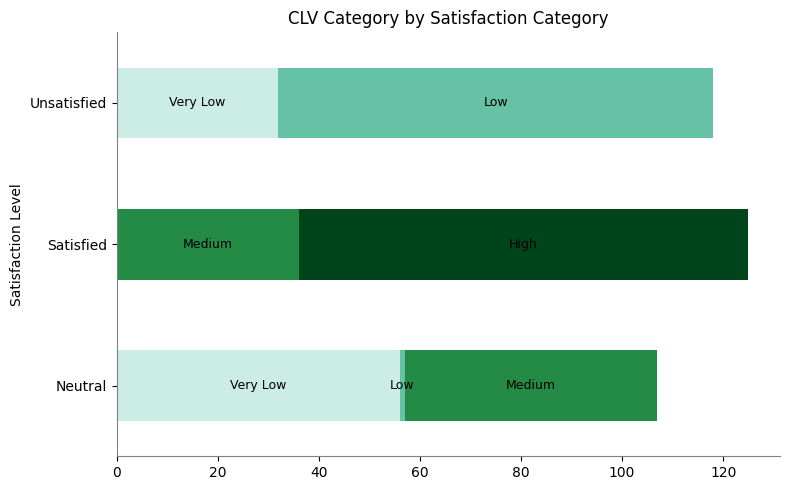

In [20]:
clv_by_satisfaction = pd.crosstab(df['Satisfaction Level'], df['CLV Category'])
clv_by_satisfaction = clv_by_satisfaction[['Very Low', 'Low', 'Medium', 'High']]

colors = ['#ccece6', '#66c2a4', '#238b45', '#00441b']

ax = clv_by_satisfaction.plot(
    kind='barh',
    stacked=True,
    figsize=(8, 5),
    color=colors
)

ax.set_yticks(range(len(clv_by_satisfaction.index)))
ax.set_yticklabels(clv_by_satisfaction.index)

for container in ax.containers:
    for i, patch in enumerate(container.patches):
        width = patch.get_width()
        if width > 0:

            x = patch.get_x() + width / 2
            y = patch.get_y() + patch.get_height() / 2
            clv_category = clv_by_satisfaction.columns[ax.containers.index(container)]
            ax.text(
                x,
                y,
                f"{clv_category}",
                va='center',
                ha='center',
                color='black',
                fontsize=9
            )


plt.title('CLV Category by Satisfaction Category')
plt.xlabel('')
plt.ylabel('Satisfaction Level')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.legend().remove()
plt.tight_layout()
plt.show()

**Satisfaction Level vs CLV**

All High-CLV customers report being satisfied with the service.  
Meanwhile, Medium-CLV customers are split: 58% are satisfied, while 42% are neutral.

**Interpretation:** 

Customer satisfaction plays a critical role in driving value. Improving satisfaction could directly impact loyalty and revenue.

In [21]:
df.groupby('CLV Category')['Items Purchased'].mean()

CLV Category
High        18.528090
Low         10.977011
Medium      12.674419
Very Low     8.136364
Name: Items Purchased, dtype: float64

In [22]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,CLV,CLV Category
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,1120.20,Medium
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,780.50,Medium
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,510.75,Low
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,1480.30,High
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,720.40,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,660.30,Low
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,470.50,Very Low
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,1190.80,High
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,780.20,Medium


In [23]:
df.groupby('CLV Category')['Days Since Last Purchase'].mean()

CLV Category
High        15.292135
Low         43.597701
Medium      18.848837
Very Low    28.761364
Name: Days Since Last Purchase, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


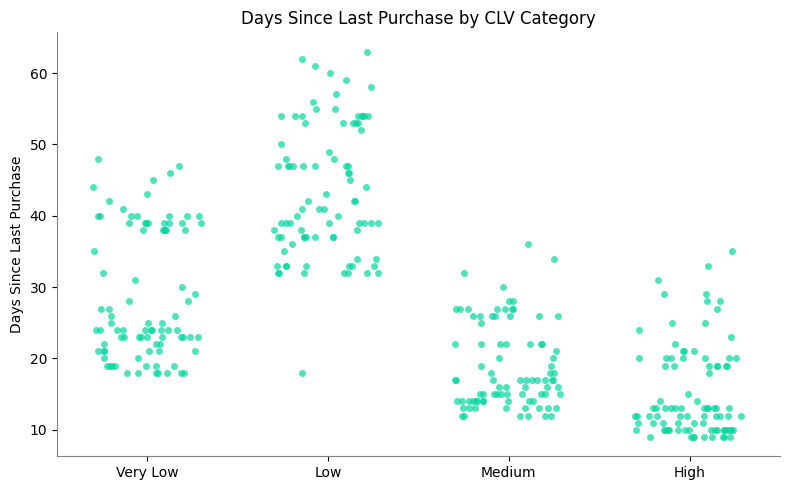

In [24]:
ordered_clv = ['Very Low', 'Low', 'Medium', 'High']
df['CLV Category'] = pd.Categorical(df['CLV Category'], categories=ordered_clv, ordered=True)

plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='CLV Category', y='Days Since Last Purchase',
              color='#06D6A0', alpha=0.7, jitter=0.3)

plt.title('Days Since Last Purchase by CLV Category')
plt.xlabel('')
plt.ylabel('Days Since Last Purchase')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()

In [25]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,CLV,CLV Category
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,1120.20,Medium
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,780.50,Medium
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,510.75,Low
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,1480.30,High
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,720.40,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,660.30,Low
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,470.50,Very Low
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,1190.80,High
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,780.20,Medium


In [26]:
pd.crosstab(df['City'], df['CLV Category'])


CLV Category,Very Low,Low,Medium,High
City,,,,
Chicago,30,28,0,0
Houston,58,0,0,0
Los Angeles,0,1,58,0
Miami,0,58,0,0
New York,0,0,28,31
San Francisco,0,0,0,58


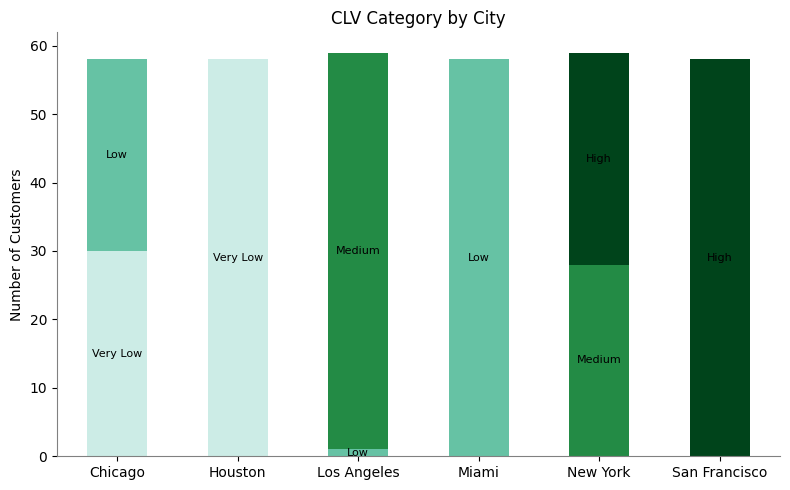

In [27]:
clv_by_city = pd.crosstab(df['City'], df['CLV Category'])
clv_by_city = clv_by_city[['Very Low', 'Low', 'Medium', 'High']]

top_cities = clv_by_city.sum(axis=1).index
clv_by_city = clv_by_city.loc[top_cities]

colors = ['#ccece6', '#66c2a4', '#238b45', '#00441b']

ax = clv_by_city.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=colors
)

for container in ax.containers:
    for patch in container:
        height = patch.get_height()
        if height > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + height / 2
            label = clv_by_city.columns[ax.containers.index(container)]
            ax.text(x, y, label, ha='center', va='center', fontsize=8, color='black')

plt.title('CLV Category by City')
plt.xlabel('')
plt.ylabel('Number of Customers')

plt.xticks(rotation=0, ha='center')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.legend().remove()
plt.tight_layout()
plt.show()

**Location vs CLV**

- San Francisco: 100% of customers are High-CLV  
- Los Angeles: 91% Medium-CLV, only 9% High  
- New York: Mixed, 60% Medium and 40% High

**Interpretation:**

San Francisco shows strong customer potential. New York and Los Angeles also show growth opportunities if targeted properly.

In [28]:
def age_category(age):
    if age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 37:
        return 'Adult'
    else:
        return 'Mature Adult'

df['Age Category'] = df['Age'].apply(age_category)
df['Age Category'].value_counts()

Age Category
Adult           166
Young Adult     117
Mature Adult     67
Name: count, dtype: int64

In [29]:
pd.crosstab(df['Age Category'], df['CLV Category'])


CLV Category,Very Low,Low,Medium,High
Age Category,,,,
Adult,49,25,84,8
Mature Adult,39,28,0,0
Young Adult,0,34,2,81


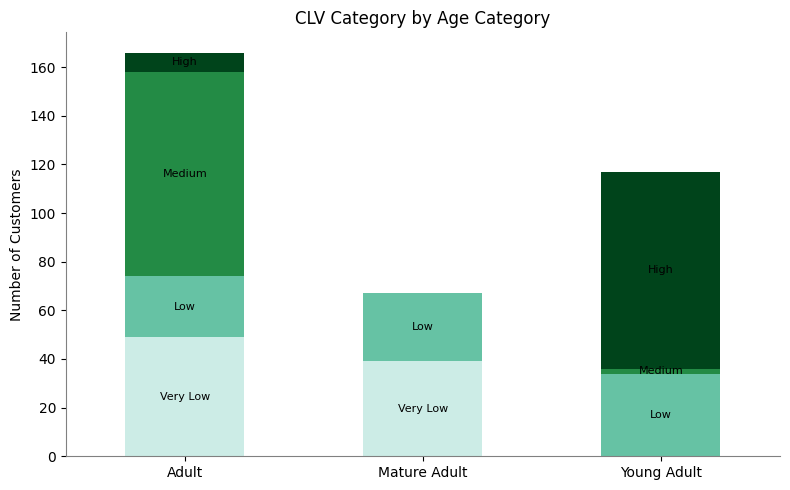

In [30]:
clv_by_age = pd.crosstab(df['Age Category'], df['CLV Category'])
clv_by_age = clv_by_age[['Very Low', 'Low', 'Medium', 'High']]

colors = ['#ccece6', '#66c2a4', '#238b45', '#00441b']

ax = clv_by_age.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=colors
)

for container in ax.containers:
    for patch in container:
        height = patch.get_height()
        if height > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + height / 2
            label = clv_by_city.columns[ax.containers.index(container)]
            ax.text(x, y, label, ha='center', va='center', fontsize=8, color='black')

plt.title('CLV Category by Age Category')
plt.xlabel('')
plt.ylabel('Number of Customers')

plt.xticks(rotation=0, ha='center')

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.legend().remove()
plt.tight_layout()
plt.show()

**Final Insight & Recommendation**

This analysis shows that high-value customers tend to be:
- Gold members
- Satisfied with service
- Located in San Francisco

These three characteristics strongly correlate with customer lifetime value. Therefore, I recommend:

1. Focusing on San Francisco, New York, and Los Angeles for customer retention and expansion efforts  
2. Promoting Gold membership upgrades through targeted campaigns  
3. Enhancing the overall customer experience to boost satisfaction and long-term loyalty

By focusing on these segments and strategies, the business can improve retention and maximize lifetime value across key regions.

